In [34]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [35]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [36]:
bad_officer_appointments = '../data/bad_officer_appointments.csv'
good_officer_appointments = '../data/good_officer_appointments.csv'
officer_information_directory = '../data/officer_attribute_store/'

In [37]:
def extract_officer_attributes_data(csv_file_path, json_directory, appointment_type):
    bad_officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = bad_officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        officer_info = json_data.get('officer')
        if officer_info:
            officer_birthday = officer_info.get('birthday', 'unknown')

            appointment_info = officer_info.get(appointment_type)
            if appointment_info:
                for company_number, officer_list in appointment_info.items():
                    for officer in officer_list:
                        appointment_start_date = officer.get('appointment_start_date')
                        appointment_end_date = officer.get('appointment_end_date')
                        appointment_length = officer.get('appointment_length')
                        officer_role = officer.get('officer_role')
                        officer_first_name = officer.get('officer_first_name')
                        officer_middle_name = officer.get('officer_middle_name')
                        officer_last_name = officer.get('officer_last_name')
                        officer_is_shareholder = officer.get('officer_is_shareholder')
                        officer_is_company = officer.get('officer_is_company')
                        officer_type = officer.get('officer_type')

                        matched_officer_data.append((
                            officer_number,
                            company_number,
                            appointment_start_date,
                            appointment_end_date,
                            appointment_length,
                            officer_role,
                            officer_first_name,
                            officer_middle_name,
                            officer_last_name,
                            officer_is_shareholder,
                            officer_is_company,
                            officer_type,
                            officer_birthday
                        ))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'appointment_start_date', 'appointment_end_date', 'appointment_length', 'officer_role', 'officer_first_name', 'officer_middle_name', 'officer_last_name', 'officer_is_shareholder', 'officer_is_company', 'officer_type', 'officer_birthday'])


In [38]:
good_officer_company_attributes_data_other = extract_officer_attributes_data(good_officer_appointments,officer_information_directory, 'other')
bad_officer_company_attributes_data_other = extract_officer_attributes_data(bad_officer_appointments,officer_information_directory, 'other')

In [39]:
#Calculating officer age for good officers from their birthday
good_officer_company_attributes_data_other['officer_birthday'] = good_officer_company_attributes_data_other['officer_birthday'].replace('unknown', np.nan)

good_officer_company_attributes_data_other['officer_birthday'] = pd.to_datetime(good_officer_company_attributes_data_other['officer_birthday'], errors='coerce')

current_date = pd.to_datetime('today')
good_officer_company_attributes_data_other['officer_age'] = (current_date - good_officer_company_attributes_data_other['officer_birthday']).dt.days // 365


In [40]:
#Calculating officer age for bad officers from their birthday
bad_officer_company_attributes_data_other['officer_birthday'] = bad_officer_company_attributes_data_other['officer_birthday'].replace('unknown', np.nan)

bad_officer_company_attributes_data_other['officer_birthday'] = pd.to_datetime(bad_officer_company_attributes_data_other['officer_birthday'], errors='coerce')

current_date = pd.to_datetime('today')
bad_officer_company_attributes_data_other['officer_age'] = (current_date - bad_officer_company_attributes_data_other['officer_birthday']).dt.days // 365


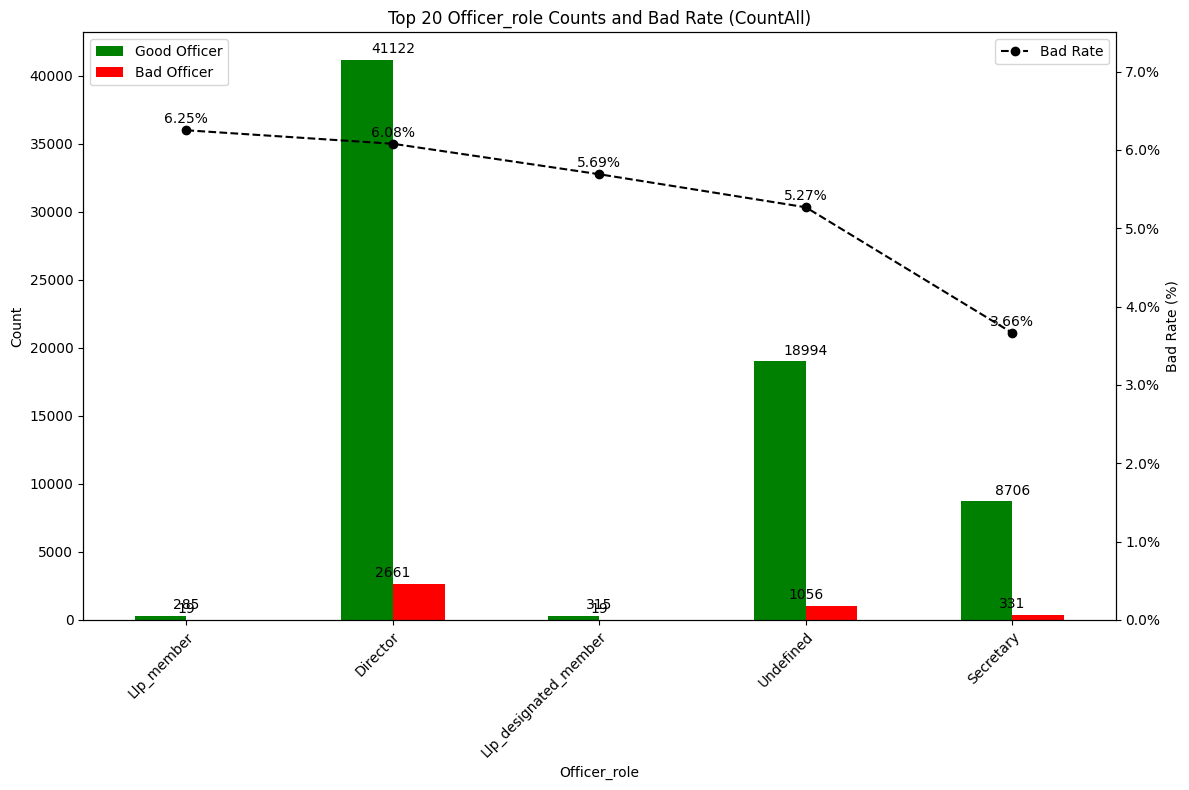

In [9]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_role', count_type='count_all', top_num_values=20)


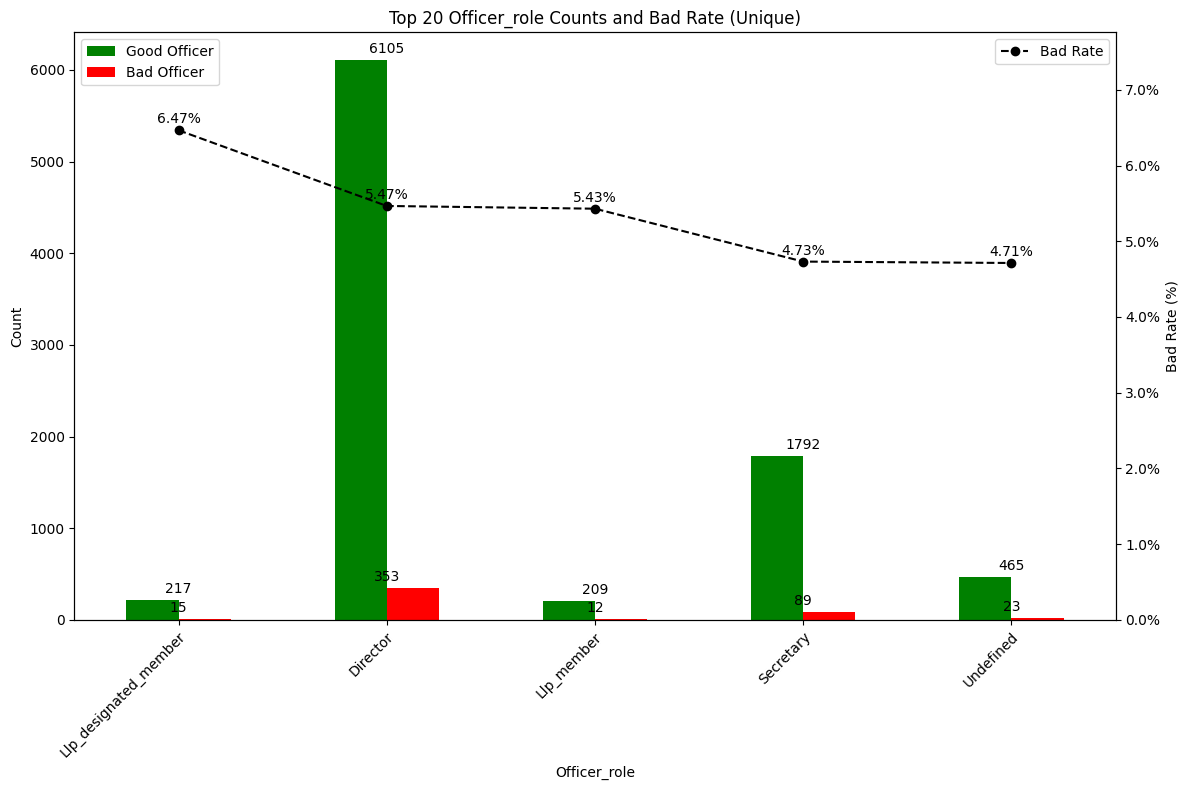

In [10]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_role', count_type='unique', top_num_values=20)


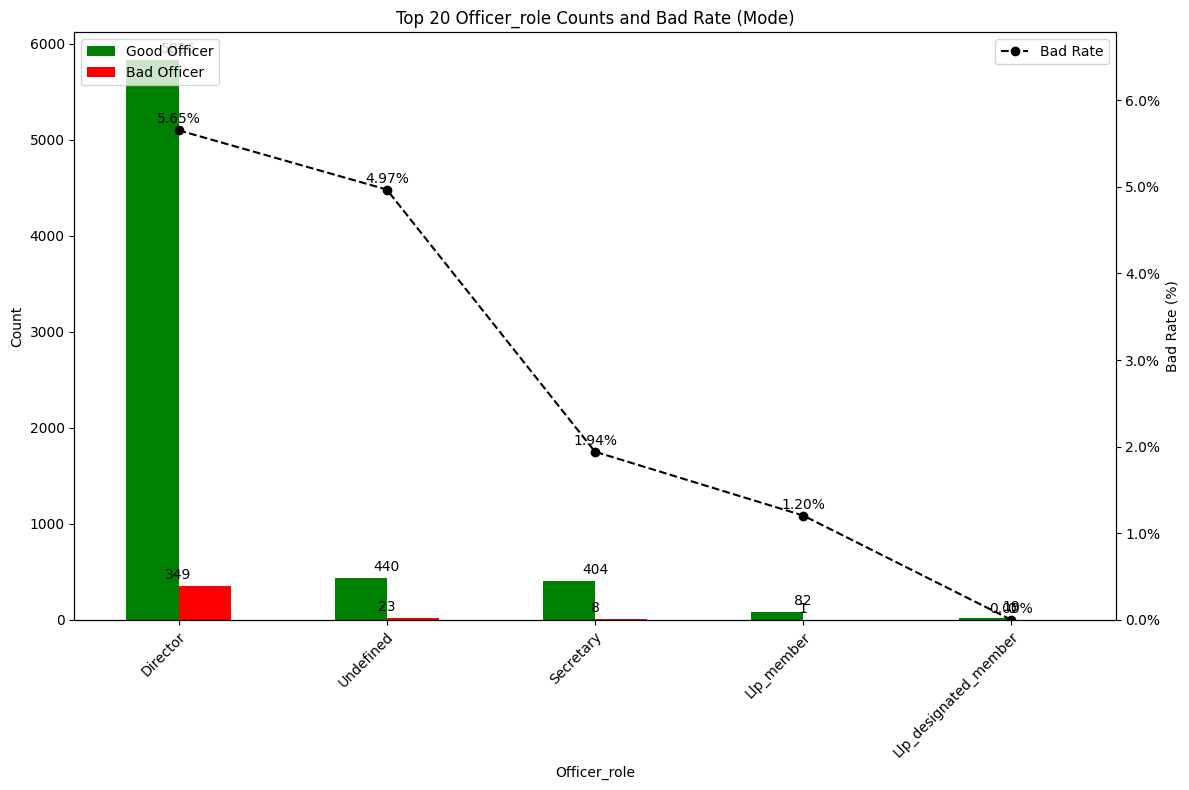

In [11]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_role', count_type='mode', top_num_values=20)


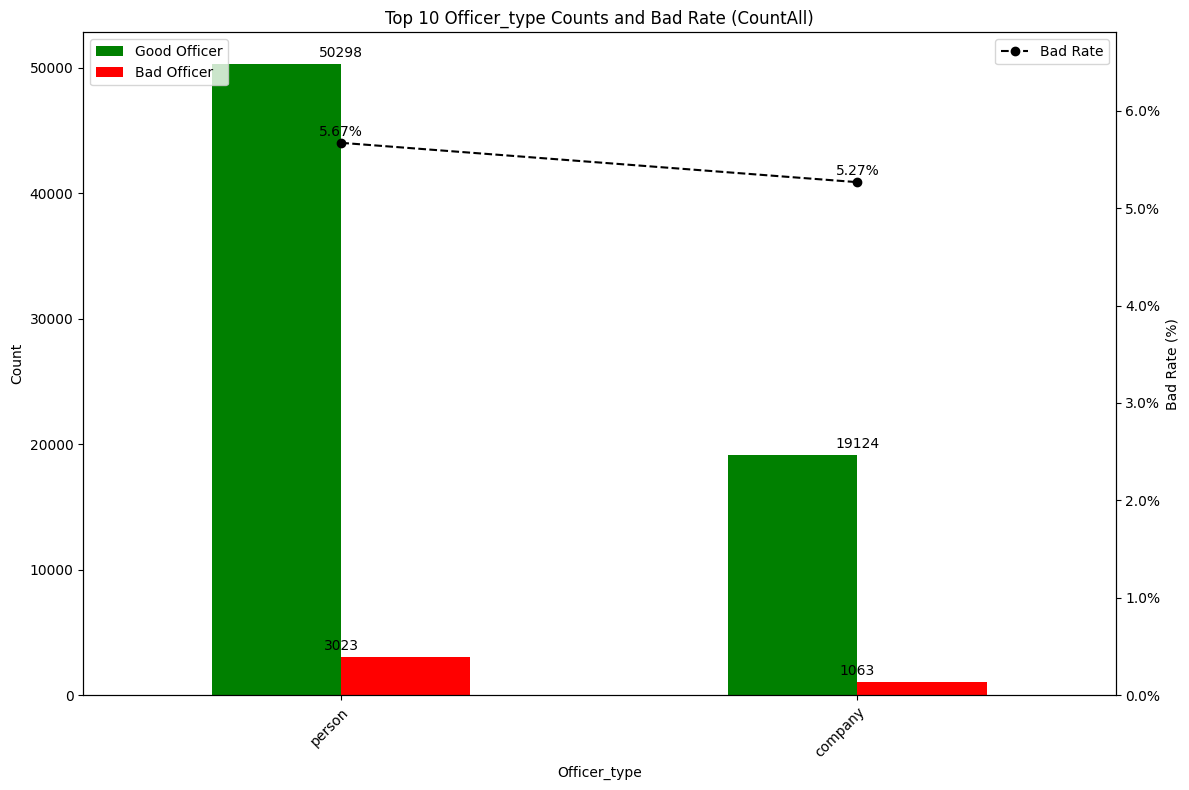

In [17]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_type', count_type='count_all')


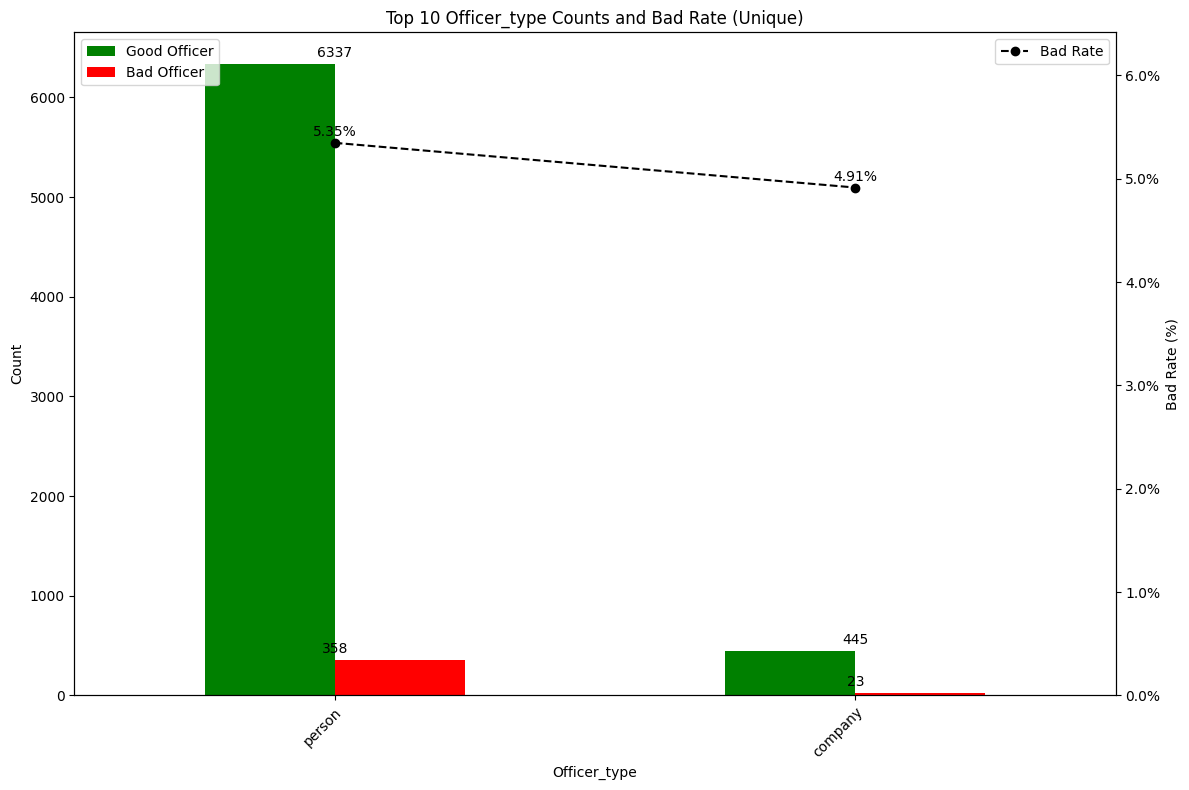

In [18]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_type', count_type='unique')


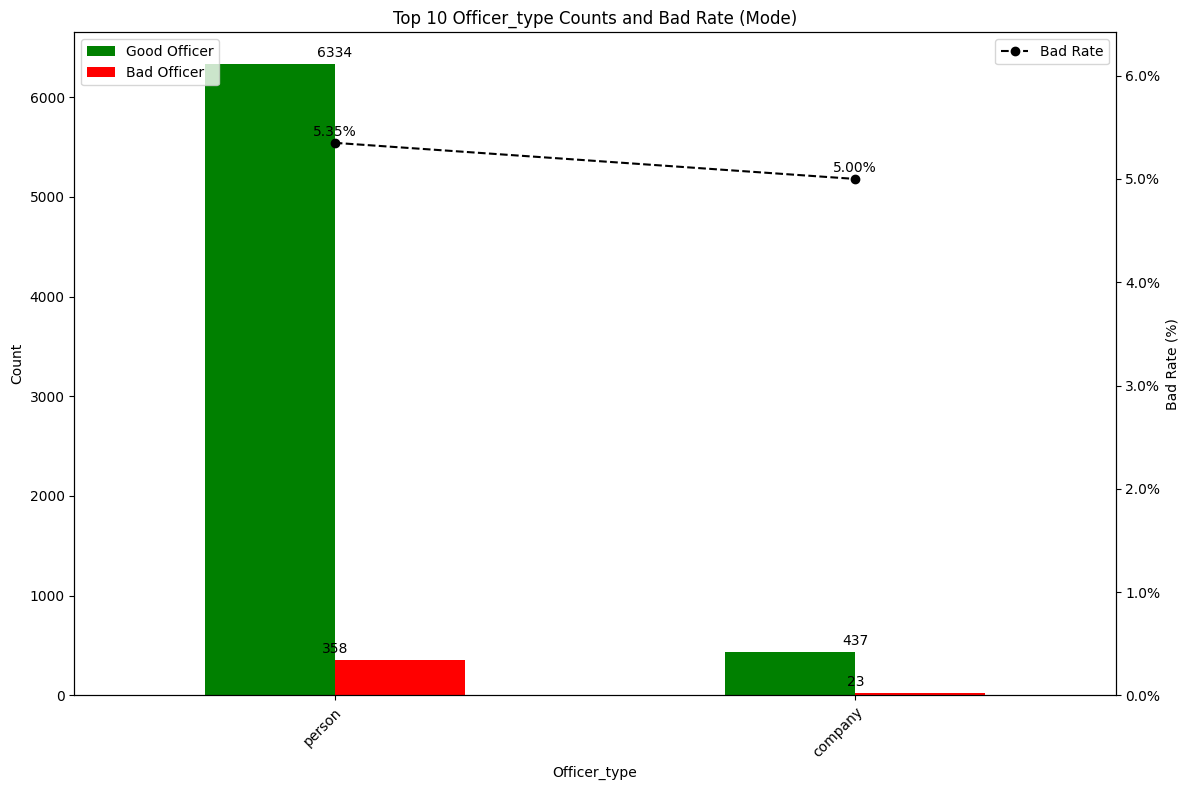

In [19]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_type', count_type='mode')


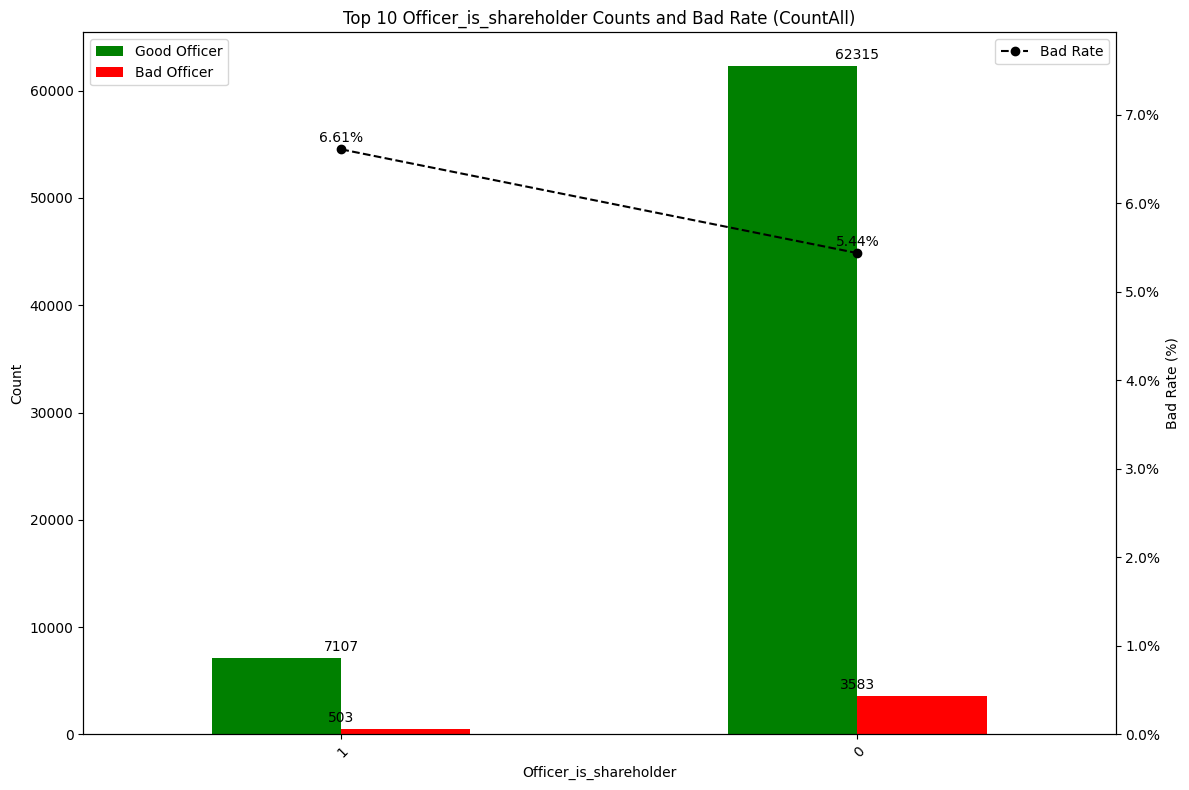

In [20]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_is_shareholder', count_type='count_all')


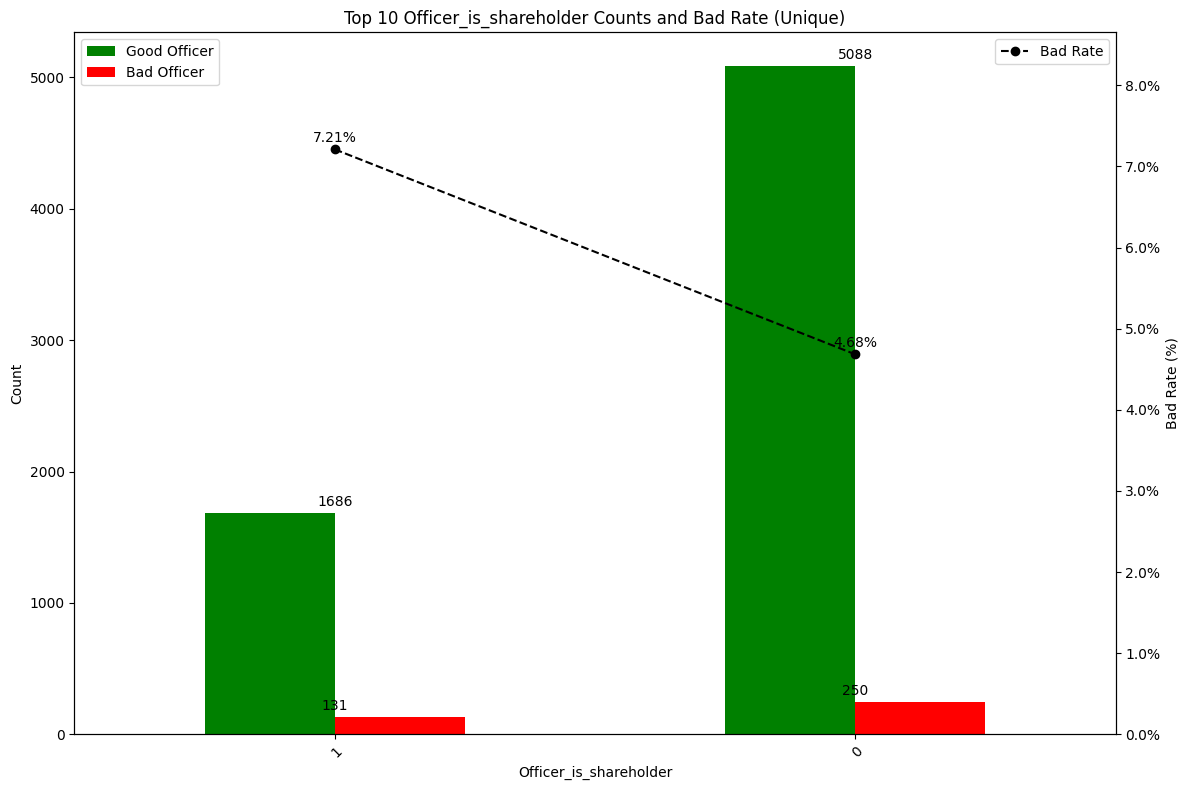

In [22]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_is_shareholder', count_type='unique')


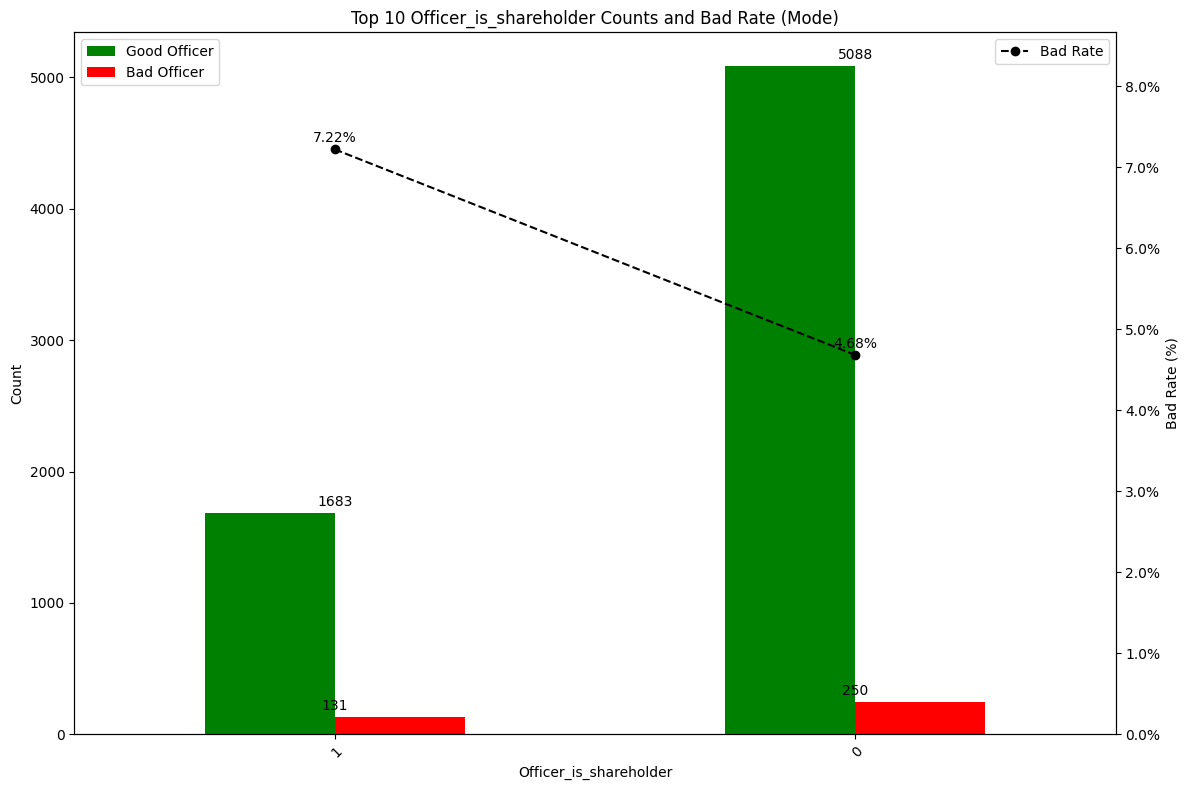

In [23]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'officer_is_shareholder', count_type='mode')


In [13]:
def extract_officer_nationality(csv_file_path, json_directory):
    df = pd.read_csv(csv_file_path)

    result_df = pd.DataFrame(columns=['officer_number', 'nationality'])

    for filename in os.listdir(json_directory):
        if filename.endswith('.json'):
            officer_number = filename.split('.json')[0]

            if officer_number in df['officer_number'].values:
                json_path = os.path.join(json_directory, filename)
                with open(json_path, 'r') as file:
                    data = json.load(file)
                    nationality = data.get('nationality')
                    if nationality and isinstance(nationality, dict):
                        nationality = list(nationality.keys())[0]
                    else:
                        nationality = None

                officer_df = pd.DataFrame({'officer_number': [officer_number], 'nationality': [nationality]})

                result_df = pd.concat([result_df, officer_df], ignore_index=True)

    return result_df

In [14]:
good_officer_nationality_data = extract_officer_nationality(good_officer_appointments,officer_information_directory)
bad_officer_nationality_data = extract_officer_nationality(bad_officer_appointments,officer_information_directory)

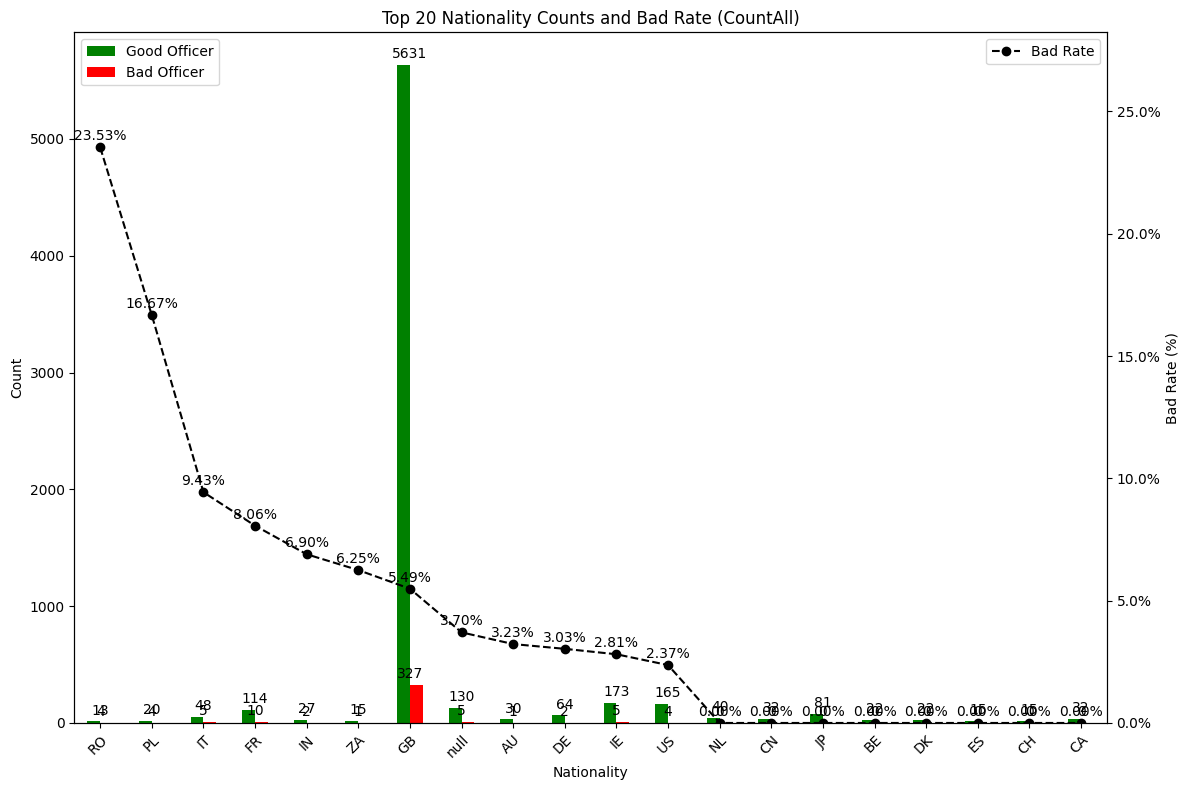

In [16]:
plot_attribute_counts_bad_rate_count_type(good_officer_nationality_data, bad_officer_nationality_data, 'nationality', count_type='count_all', top_num_values=20)


In [75]:
def calculate_mean_median_appointment_lengths(good_df, bad_df, metric):
    good_df['appointment_length'] = pd.to_numeric(good_df['appointment_length'], errors='coerce')
    bad_df['appointment_length'] = pd.to_numeric(bad_df['appointment_length'], errors='coerce')

    if metric == 'mean':
        good_mean_lengths = good_df.groupby('officer_number')['appointment_length'].mean()
        bad_mean_lengths = bad_df.groupby('officer_number')['appointment_length'].mean()
        good_overall_metric = good_mean_lengths.mean()
        bad_overall_metric = bad_mean_lengths.mean()
    elif metric == 'median':
        good_median_lengths = good_df.groupby('officer_number')['appointment_length'].median()
        bad_median_lengths = bad_df.groupby('officer_number')['appointment_length'].median()
        good_overall_metric = good_median_lengths.median()
        bad_overall_metric = bad_median_lengths.median()
    else:
        raise ValueError("Invalid metric. Please choose 'mean' or 'median'.")

    fig, ax = plt.subplots()
    x = [0, 1]
    labels = ['Good', 'Bad']
    colors = ['green', 'red']

    # Plotting bars for mean or median appointment lengths
    ax.bar(x[0], good_overall_metric, color=colors[0], label='Good')
    ax.bar(x[1], bad_overall_metric, color=colors[1], label='Bad')

    # Adding values on top of the bars
    ax.text(x[0], good_overall_metric, str(round(good_overall_metric, 2)), ha='center', va='bottom')
    ax.text(x[1], bad_overall_metric, str(round(bad_overall_metric, 2)), ha='center', va='bottom')

    # Setting plot labels and title
    ax.set_xlabel('Officer Type')
    ax.set_ylabel(f'{metric.capitalize()} Appointment Length')
    ax.set_title(f'{metric.capitalize()} Appointment Length for Good and Bad Officers')

    # Setting x-axis ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    # Displaying legend
    ax.legend()

    # Displaying the plot
    plt.show()



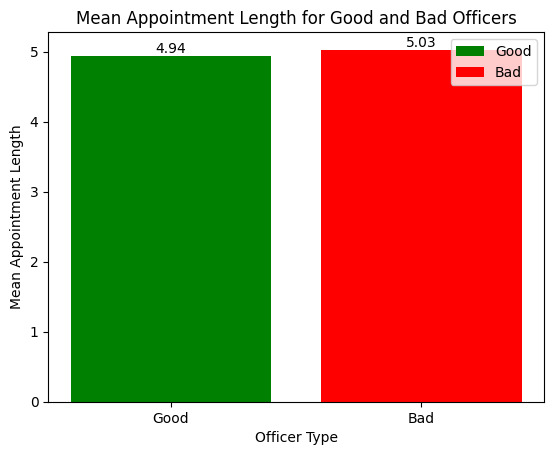

In [76]:
calculate_mean_median_appointment_lengths(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'mean')


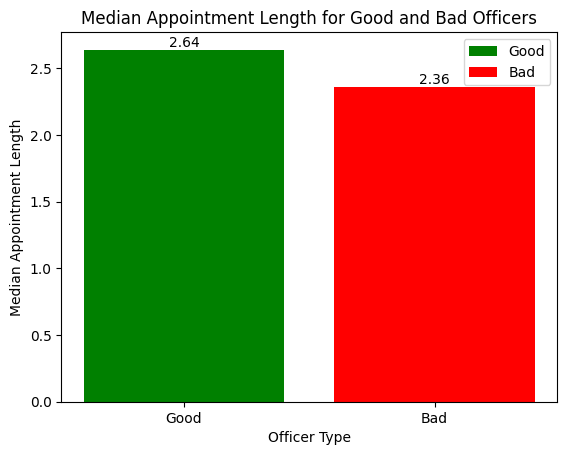

In [77]:
calculate_mean_median_appointment_lengths(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'median')


In [78]:
def calculate_mean_median_officer_age(good_df, bad_df, metric):
    good_df['officer_age'] = pd.to_numeric(good_df['officer_age'], errors='coerce')
    bad_df['officer_age'] = pd.to_numeric(bad_df['officer_age'], errors='coerce')

    if metric == 'mean':
        good_metric_age = good_df.groupby('officer_number')['officer_age'].mean()
        bad_metric_age = bad_df.groupby('officer_number')['officer_age'].mean()
    elif metric == 'median':
        good_metric_age = good_df.groupby('officer_number')['officer_age'].median()
        bad_metric_age = bad_df.groupby('officer_number')['officer_age'].median()
    else:
        raise ValueError("Invalid metric. Please choose 'mean' or 'median'.")

    good_overall_metric = good_metric_age.mean()
    bad_overall_metric = bad_metric_age.mean()

    fig, ax = plt.subplots()
    x = [0, 1]
    labels = ['Good', 'Bad']
    colors = ['green', 'red']

    ax.bar(x[0], good_overall_metric, color=colors[0], label='Good')
    ax.bar(x[1], bad_overall_metric, color=colors[1], label='Bad')

    ax.text(x[0], good_overall_metric, str(round(good_overall_metric, 2)), ha='center', va='bottom')
    ax.text(x[1], bad_overall_metric, str(round(bad_overall_metric, 2)), ha='center', va='bottom')

    ax.set_xlabel('Officer Type')
    ax.set_ylabel(f'{metric.capitalize()} Officer Age')
    ax.set_title(f'{metric.capitalize()} Officer Age for Good and Bad Officers')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    ax.legend()

    plt.show()



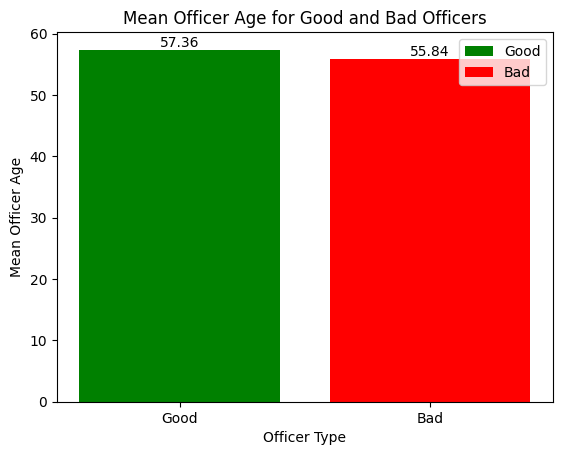

In [79]:
calculate_mean_median_officer_age(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'mean')


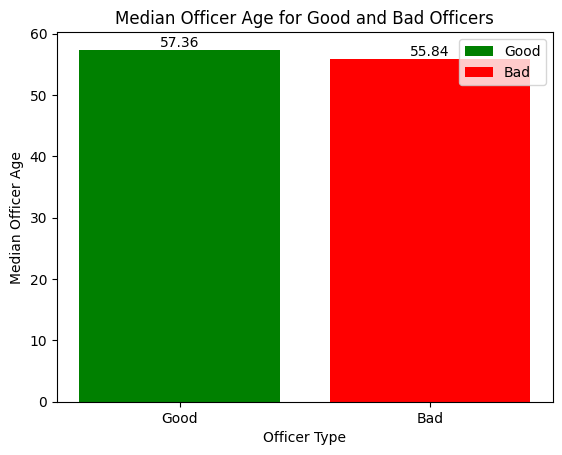

In [80]:
calculate_mean_median_officer_age(good_officer_company_attributes_data_other, bad_officer_company_attributes_data_other, 'median')
